<a href="https://colab.research.google.com/github/happycindy7201/-/blob/main/9%EC%A3%BC%EC%B0%A8_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EC%8B%A4%EC%8A%B5_Cifar_10)_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98swish%2C_%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80nadm_%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 분류

## 데이터 준비

In [1]:
import tensorflow as tf

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all,
                                                  test_size=0.2, random_state=42)

In [4]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [5]:
x_train.shape, x_val.shape, y_train_encoded.shape, y_val_encoded.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [6]:
x_train = x_train.reshape(-1, 32, 32, 3)
x_val = x_val.reshape(-1, 32, 32, 3)

In [7]:
x_train.shape,x_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
x_train = x_train / 255
x_val = x_val / 255

## 합성곱 신경망 모델

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
conv1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         256,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257,390 (1005.43 KB)

 Trainable params: 257,390 (1005.43 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = conv1.fit(x_train, y_train_encoded, epochs=20,
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3436 - loss: 1.8231 - val_accuracy: 0.4848 - val_loss: 1.4549
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5051 - loss: 1.3935 - val_accuracy: 0.5424 - val_loss: 1.3158
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5675 - loss: 1.2383 - val_accuracy: 0.5556 - val_loss: 1.2670
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5973 - loss: 1.1446 - val_accuracy: 0.5909 - val_loss: 1.1892
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6219 - loss: 1.0768 - val_accuracy: 0.5924 - val_loss: 1.1731
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6405 - loss: 1.0311 - val_accuracy: 0.6052 - val_loss: 1.1531
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6594 - loss: 0.9783 - val_accuracy: 0.6017 - val_loss: 1.1836
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6715 - loss: 0.9388 - 

In [14]:
import matplotlib.pyplot as plt

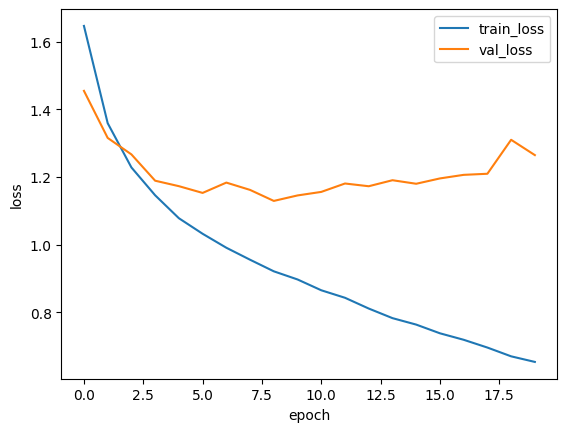

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

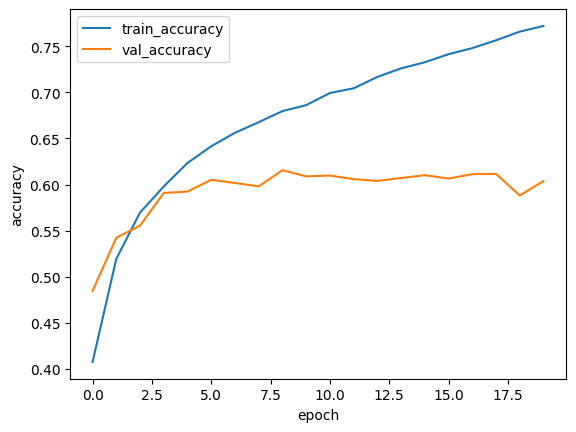

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [17]:
loss, accuracy = conv1.evaluate(x_val, y_val_encoded, verbose=0)

In [18]:
print(accuracy)

0.6037999987602234


## Dropout

In [19]:
from tensorflow.keras.layers import Dropout

In [20]:
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [21]:
conv2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         256,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257,390 (1005.43 KB)

 Trainable params: 257,390 (1005.43 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
conv2.compile(optimizer='nadam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = conv2.fit(x_train, y_train_encoded, epochs=20,
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3673 - loss: 1.7523 - val_accuracy: 0.5184 - val_loss: 1.3713
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5082 - loss: 1.3843 - val_accuracy: 0.5423 - val_loss: 1.2922
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5418 - loss: 1.2899 - val_accuracy: 0.5730 - val_loss: 1.2046
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5637 - loss: 1.2203 - val_accuracy: 0.5883 - val_loss: 1.1672
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5891 - loss: 1.1626 - val_accuracy: 0.5840 - val_loss: 1.1760
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6031 - loss: 1.1162 - val_accuracy: 0.6071 - val_loss: 1.1131
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6165 - loss: 1.0800 - val_accuracy: 0.6050 - val_loss: 1.1153
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6252 - loss: 1.0486 - 

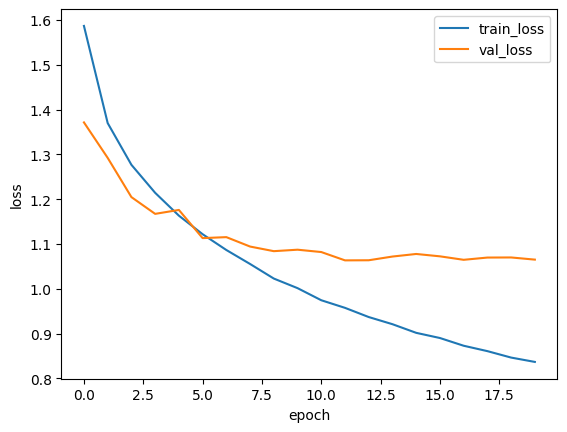

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

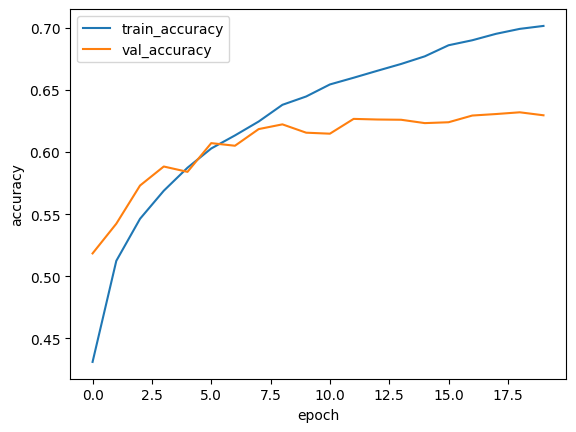

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [26]:
loss, accuracy = conv2.evaluate(x_val, y_val_encoded, verbose=0)

In [27]:
print(accuracy)

0.6294999718666077


##swish 활성화 함수 적용,옵티마이저 nadam 적용

In [33]:
conv3 = tf.keras.Sequential()
conv3.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
conv3.add(MaxPooling2D((2, 2)))
conv3.add(Flatten())
conv3.add(Dropout(0.5))
conv3.add(Dense(100, activation='swish'))
conv3.add(Dropout(0.5))
conv3.add(Dense(10, activation='softmax'))
conv3.compile(optimizer='nadam', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = conv3.fit(x_train, y_train_encoded, epochs=20,
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3378 - loss: 1.8281 - val_accuracy: 0.5251 - val_loss: 1.3597
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4848 - loss: 1.4313 - val_accuracy: 0.5505 - val_loss: 1.2748
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5113 - loss: 1.3626 - val_accuracy: 0.5703 - val_loss: 1.2422
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5297 - loss: 1.3182 - val_accuracy: 0.5697 - val_loss: 1.2207
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5383 - loss: 1.2862 - val_accuracy: 0.5833 - val_loss: 1.1862
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5502 - loss: 1.2669 - val_accuracy: 0.5954 - val_loss: 1.1636
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5578 - loss: 1.2390 - val_accuracy: 0.6061 - val_loss: 1.1478
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5644 - loss: 1.2254 - 

In [34]:
loss, accuracy = conv3.evaluate(x_val, y_val_encoded, verbose=0)
print(accuracy)

0.6338000297546387
